# Prototype data generation

In this notebook we will layout an example workflow that can be used with the prototype cubing engine which is the endgoal of MS19 in the BmD project. 

## Setup

In order to utilize the modules that were written for this project we will add the path temporarily to the environment so that we will not need to do a setup

In [9]:
import sys
import os

# Get the path to src/ relative to this notebook
notebook_dir = os.getcwd()
src_path = os.path.abspath(os.path.join(notebook_dir, "../../src"))

# Add to Python path if not already there
if src_path not in sys.path:
    sys.path.insert(0, src_path)

## Prototype Area of interest

For the prototype we will look at one of the Natura2000 sites in Belgium, the Sonian Forest and the surrounding sites. In the W3 T1 documentation for the BmD project a complete description of this area is given but we will provide a short overview in this notebook as well.

<div style="float: right; width: 50%; margin-left: 15px; text-align: center;">
  <img src="img/AOI.png" alt="Sonian Forest" style="width:100%;">
  <div style="font-size: 90%; color: gray; margin-top: 4px;">
    <em>Figure 1:</em> Sonian Forest and its surrounding Natura2000 areas
  </div>
</div>

<p>
  The Sonian Forest and its surrounding areas are characterized by a set of habitats, which can be found on the 
  <a href="https://natura2000.eea.europa.eu/" target="_blank">Natura2000</a> website. The areas of interest are characterized by:
</p>

<ol>
  <li>
    <strong>La Forêt de Soignes avec lisières et domaines boisés avoisinants et la Vallée de la Woluwe</strong> – 
    <em>complexe Forêt de Soignes - Vallée de la Woluwe</em>
    <ul>
      <li><strong>Area code:</strong> BE1000001</li>
      <li><strong>Protected under:</strong> the Habitats Directive</li>
      <li><strong>Area:</strong> 2066 ha</li>
      <li><strong>Protected:</strong> 5 species & 8 habitats</li>
    </ul>
  </li>
  <li>
    <strong>Sonian Forest</strong>
    <ul>
      <li><strong>Area code:</strong> BE2400008</li>
      <li><strong>Protected under:</strong> the Habitats Directive</li>
      <li><strong>Area:</strong> 2066 ha</li>
      <li><strong>Protected:</strong> 3 species & 9 habitats</li>
    </ul>
  </li>
  <li>
    <strong>Vallées de l'Argentine et de la Lasne</strong>
    <ul>
      <li><strong>Area code:</strong> BE31002C0</li>
      <li><strong>Protected under:</strong> both Birds and Habitats Directives</li>
      <li><strong>Area:</strong> 821.45 ha</li>
      <li><strong>Protected:</strong> 16 species & 14 habitats</li>
    </ul>
  </li>
</ol>
<p>
  Each habitat is characterized by a set of species that are indicative of its health. In total there are 
  <strong>211 species of interest</strong> for this area, which are described within the file 
  <code>prototypeNames.csv</code> located in the prototype script directory under the 
  <code>inp</code> folder.
</p>

<p>
  In addition to this, we also provide a file containing the invasive species that are known within the country. 
  This list, the <em>Global Register of Introduced and Invasive Species - Belgium</em>, can be found on 
  <a href="https://www.gbif.org/dataset/6d9e952f-948c-4483-9807-575348147c7e" target="_blank">GBIF</a> and is 
  accessible as a dataset containing a Darwin Core (DwC) archive.
</p>

In [2]:
#Bbox formatted with long_min, lat_min, long_max, lat_max for the areas of interest
aoi_bbox = (4.171371,50.684060,4.743004,50.877911)
#Path and filename to the species of interest
species_oi_path = "inp"
species_oi_file = "prototypeNames.csv"
#Path and filename to the invasive species
species_inv_path = "inp/dwca-unified-checklist-v1.14"
species_inv_file = "taxon.txt"

## GBIF 

### GBIF data gathering

In this section we will use the functions described in 'src\datasource\gbif.py' to obtain relevant biodiversity data

In [3]:
from datasource.gbif import gbif_sql

INFO:Note: NumExpr detected 22 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:NumExpr defaulting to 16 threads.


In [4]:
species_oi_df, mismatch_oi_df = gbif_sql.fetch_taxon_info(species_oi_file, 
                                                         inp_path=species_oi_path,
                                                         out_file="species_oi.csv",
                                                         out_path="out",
                                                         mismatch_file="species_mm.csv",
                                                         keep_higherrank=False)
species_oi_keys = species_oi_df["acceptedUsageKey"].values

'NONE' and 'HIGHERRANK' matches encountered while searching through the GBIF taxonomic backbone:
The following lookup names (Carex sp., Lathyrus montanus, Chara sp, Ranunculus nemorosus, Salix alba, Lotus uliginosus, Picea abie) resulted in 'NONE' or 'HIGHERRANK' type match. Potential reasons can be found in the mismatch_df under the key 'note'


C:\Users\niels\Documents\Repositories\BmC\src\datasource\gbif\gbif_sql.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxonomic_df["acceptedUsageKey"].fillna(taxonomic_df["usageKey"], inplace=True)


In [5]:
species_oi_keys

array([ 2914547,  3113784,  7502456,  6027388,  3923253,  2481119,
        3135329,  5275012,  2481819,  2891147,  9118014,  2874027,
        5331258,  2650133,  2685484,  2926557,  2787993,  2723315,
        2926683,  8397184,  5304283,  3133702,  3033665,  9444556,
        2673408,  5371874,  5410564,  5329192,  3033266,  5289877,
        2727917,  2704505,  5334277,  2739622,  2882316,  3085811,
        2701418,  2914642,  5365576,  3085424,  5371781,  3189172,
        3039454,  5341478,  2360842,  2480726,  5369701,  3054168,
        2671130,  2704211,  5386897,  5365496,  3029627,  3033263,
        5366922,  2480910,  5301213,  2882482,  2729081,  5290194,
        9490132,  2882833,  5388835,  2756540,  5371889,  4149465,
        5314725,  2878688,  2890668,  5405976,  9213153,  7277865,
        2681729,  7960979,  2477872,  3190715,  3113650,  5385604,
        2888808,  2724609,  5333408,  2702717,  5384795,  3191374,
        7883344,  5664390,  7702019,  2676091,  2493129,  5371

In [8]:
len(species_oi_keys)

204

In [7]:
gbif_sql.generate_json_query(species_oi_keys, aoi_bbox, 1980, 2020,
                            out_file="gbif_oi_query.json", out_path="out", notificationAddress=["niels.billiet@plantentuinmeise.be"])

In [12]:
species_inv_keys = [int(key) for key in  gbif_sql.extract_keys_dwc("invasiveNames.txt", "inp")]

In [13]:
gbif_sql.generate_json_query(species_inv_keys, aoi_bbox, 
                            out_file="gbif_inv_query.json", out_path="out", notificationAddress=["niels.billiet@plantentuinmeise.be"])

Executing this code will generate .json file that will be stored within the current working directory. This json file can subsequently be used to call the GBIF SQL API through the gbifCube.sh bash script. 
1) Assure that the bash script has the correct permission to be execute from the shell. To check whether the file has the correct permission to execute use the `ls -l gbifCube.sh` command in the shell. If the file has execution permission it should have the `x` character. If the script does not have the right permission on your system use the `chmod +x gbifCube.sh` in your shell
2) In order to run this bash script, GBIF credentials should be added to the `~/.bashrc`
```
EXPORT GBIF_USERNAME = "yourUserName"
EXPORT GBIF_EMAIL = "yourAccountEmail"
EXPORT GBIF_PASSWORD = "yourPassword"
```
3) Execution of the `gbifCube.sh` script will return a message that ends in multidigit string. This multidigit string should subsequently be used to download the files

### GBIF data exploration

In this section we will perform exploration of the queried data obtained from GBIF to determine the timeframe from which we will sample CHELSA data

In [4]:
import pandas as pd

species_df = pd.read_csv("out/species_oi/0089866-250525065834625.csv", delimiter="\t")
species_df.head()

,year,month,decimallatitude,decimallongitude,specieskey,species
0,1865,5,50.751944,4.615833,3054168,Teesdalia nudicaulis
1,1901,4,50.835417,4.284758,2687943,Equisetum telmateia
2,2016,5,50.826630,4.664595,3012167,Sorbus aucuparia
3,2021,5,50.797815,4.390093,2926557,Glechoma hederacea
4,2021,5,50.810650,4.446678,5376075,Alliaria petiolata


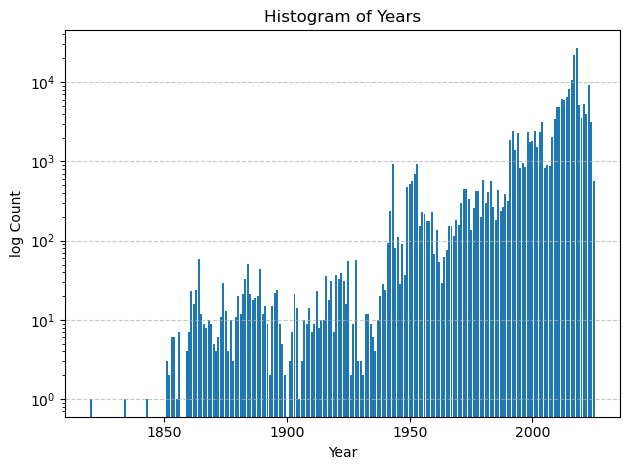

In [8]:
import matplotlib.pyplot as plt
# Count occurrences of each year
year_counts = species_df['year'].value_counts().sort_index()

# Plot as a bar chart
fig, ax = plt.subplots()
ax.bar(year_counts.index, year_counts.values, width=0.8, align='center')  # width<1 to avoid overlap

# Logarithmic y-axis
ax.set_yscale('log')

# Labeling
ax.set_xlabel('Year')
ax.set_ylabel('log Count')
ax.set_title('Histogram of Years')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### GBIF reprojection and rasterization of the data

The GBIF data itself is not yet in a format that is compatible with remote sensing data and as such we will need to reproject it and bring it to a shared raster with other data

## CHELSA

In [4]:
from rasterio.env import Env


False


In [1]:
import sys

from pathlib import Path

# Add the src directory to sys.path
sys.path.append(str(Path().resolve().parents[1] / "src"))

from utils.chelsa import extract_param
from cube import chelsa

chelsa_cube = chelsa.chelsa_cube()
#chelsa_month_param = extract_param.read_chelsa_month_param("prototype_param.yaml", "../../config")

In [2]:
chelsa_cube

In [3]:
chelsa_cube_layer_names, chelsa_cube_layers= chelsa_cube.generate_chelsa_cube("prototype_param.yaml", "../../config")

-----Retrieving monthly CHELSA data for variable 'clt'-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:06<00:00,  1.78item/s]


-----Retrieving monthly CHELSA data for variable 'cmi'-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:06<00:00,  1.78item/s]


-----Retrieving monthly CHELSA data for variable 'hurs'-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:06<00:00,  1.76item/s]


-----Retrieving monthly CHELSA data for variable 'pet'-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.61item/s]


-----Retrieving monthly CHELSA data for variable 'pr'-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.61item/s]


-----Retrieving monthly CHELSA data for variable 'rsds'-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:06<00:00,  1.73item/s]


-----Retrieving monthly CHELSA data for variable 'sfcWind'-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.63item/s]


-----Retrieving monthly CHELSA data for variable 'tas'-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:06<00:00,  1.80item/s]


-----Retrieving monthly CHELSA data for variable 'tasmax'-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:06<00:00,  1.84item/s]


-----Retrieving monthly CHELSA data for variable 'tasmin'-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:06<00:00,  1.75item/s]


-----Retrieving monthly CHELSA data for variable 'vpd'-----


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.68item/s]


-----Retrieving Reference Climatology CHELSA data for variable 'ai' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio10' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio11' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio12' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio13' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio14' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio15' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio16' in reference period 1981-2010-----
Complete
-----Retrieving Reference Climatology CHELSA data for variable 'bio17' in reference

Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.64item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'cmi' in reference period 1981-2010-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.71item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'hurs' in reference period 1981-2010-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.84item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'pet' in reference period 1981-2010-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.81item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'pr' in reference period 1981-2010-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.13item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'rsds' in reference period 1981-2010-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.03item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'sfcWind' in reference period 1981-2010-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.28item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'tas' in reference period 1981-2010-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.41item/s]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'tasmax' in reference period 1981-2010-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.29s/item]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'tasmin' in reference period 1981-2010-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:21<00:00, 10.61s/item]


-----Retrieving monthly Reference Climatology CHELSA data for variable 'vpd' in reference period 1981-2010-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.09s/item]


-----Retrieving Simulation (period) CHELSA data for variable 'bio10'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.29item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio11'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.65item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio12'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.16item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio13'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.35item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio14'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.76item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio15'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.82item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio16'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:26<00:00,  3.32s/item]


-----Retrieving Simulation (period) CHELSA data for variable 'bio17'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.69item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio18'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.63item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio19'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.63item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio1'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.71item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio2'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  2.00item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio3'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.39item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio4'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.68item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio5'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.80item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio6'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.87item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio7'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.77item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio8'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.81item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'bio9'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.82item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'fcf'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.04item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'fgd'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.77item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gdd0'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.50item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gdd10'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.69item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gdd5'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.60item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gddlgd0'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.85item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gddlgd10'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.64item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gddlgd5'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.92item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gdgfgd0'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.84item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gdgfgd10'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.93item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gdgfgd5'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.76item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gsl'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.77item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gsp'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.69item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'gst'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.83item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'kg0'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.86item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'kg1'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.84item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'kg2'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.93item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'kg3'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.02item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'kg4'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.92item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'kg5'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.83item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'lgd'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.66item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'ngd0'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.76item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'ngd10'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.56item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'ngd5'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.64item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'npp'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:05<00:00,  1.53item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'scd'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.95item/s]


-----Retrieving Simulation (period) CHELSA data for variable 'swe'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.60item/s]


-----Retrieving Simulation (monthly) CHELSA data for variable 'pr'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.20item/s]


-----Retrieving Simulation (monthly) CHELSA data for variable 'tas'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.22item/s]


-----Retrieving Simulation (monthly) CHELSA data for variable 'tasmax'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:08<00:00,  1.05s/item]


-----Retrieving Simulation (monthly) CHELSA data for variable 'tasmin'-----


Processing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:08<00:00,  1.04s/item]


In [6]:
chelsa_cube_layer_names

['chelsa_month',
 'chelsa_clim_ref_period',
 'chelsa_clim_ref_month',
 'chelsa_clim_sim_period',
 'chelsa_clim_sim_month']

In [7]:
chelsa_cube_layers

[<xarray.Dataset> Size: 686kB
 Dimensions:  (time: 12, lat: 23, long: 69)
 Coordinates:
   * time     (time) datetime64[ns] 96B 1980-01-01 1980-02-01 ... 1980-12-01
   * lat      (lat) float64 184B 50.87 50.87 50.86 50.85 ... 50.71 50.7 50.69
   * long     (long) float64 552B 4.176 4.184 4.192 4.201 ... 4.726 4.734 4.742
 Data variables:
     clt      (time, lat, long) float64 152kB 5.152e+03 5.152e+03 ... 5.758e+03
     cmi      (time, lat, long) int16 38kB 333 308 289 300 ... 598 592 579 575
     hurs     (time, lat, long) uint16 38kB 6867 6870 6873 ... 7139 7147 7156
     pet      (time, lat, long) uint16 38kB 1532 1793 1985 ... 2398 2577 2664
     pr       (time, lat, long) int32 76kB 4864 4869 4876 4893 ... 8316 8364 8418
     rsds     (time, lat, long) uint16 38kB 3080 3092 3110 ... 2246 2238 2229
     sfcWind  (time, lat, long) uint16 38kB 3666 4099 4332 ... 6001 6363 6586
     tas      (time, lat, long) int32 76kB 2740 2740 2740 2740 ... 2756 2756 2756
     tasmax   (time, lat,

In [9]:
from datatree import DataTree

datatrees = [DataTree(name=layer_name, data=ds) for layer_name, ds in zip(chelsa_cube_layer_names, chelsa_cube_layers)]

In [10]:
datatrees

[DataTree('chelsa_month', parent=None)
     Dimensions:  (time: 12, lat: 23, long: 69)
     Coordinates:
       * time     (time) datetime64[ns] 96B 1980-01-01 1980-02-01 ... 1980-12-01
       * lat      (lat) float64 184B 50.87 50.87 50.86 50.85 ... 50.71 50.7 50.69
       * long     (long) float64 552B 4.176 4.184 4.192 4.201 ... 4.726 4.734 4.742
     Data variables:
         clt      (time, lat, long) float64 152kB 5.152e+03 5.152e+03 ... 5.758e+03
         cmi      (time, lat, long) int16 38kB 333 308 289 300 ... 598 592 579 575
         hurs     (time, lat, long) uint16 38kB 6867 6870 6873 ... 7139 7147 7156
         pet      (time, lat, long) uint16 38kB 1532 1793 1985 ... 2398 2577 2664
         pr       (time, lat, long) int32 76kB 4864 4869 4876 4893 ... 8316 8364 8418
         rsds     (time, lat, long) uint16 38kB 3080 3092 3110 ... 2246 2238 2229
         sfcWind  (time, lat, long) uint16 38kB 3666 4099 4332 ... 6001 6363 6586
         tas      (time, lat, long) int32 76kB

In [12]:
datatrees[0].name

'chelsa_month'

In [14]:
dynamic_dt = DataTree(name="dynamic", children={datatrees[0].name:datatrees[0]})
dynamic_dt

DataTree('dynamic', parent=None)
└── DataTree('chelsa_month')
        Dimensions:  (time: 12, lat: 23, long: 69)
        Coordinates:
          * time     (time) datetime64[ns] 96B 1980-01-01 1980-02-01 ... 1980-12-01
          * lat      (lat) float64 184B 50.87 50.87 50.86 50.85 ... 50.71 50.7 50.69
          * long     (long) float64 552B 4.176 4.184 4.192 4.201 ... 4.726 4.734 4.742
        Data variables:
            clt      (time, lat, long) float64 152kB 5.152e+03 5.152e+03 ... 5.758e+03
            cmi      (time, lat, long) int16 38kB 333 308 289 300 ... 598 592 579 575
            hurs     (time, lat, long) uint16 38kB 6867 6870 6873 ... 7139 7147 7156
            pet      (time, lat, long) uint16 38kB 1532 1793 1985 ... 2398 2577 2664
            pr       (time, lat, long) int32 76kB 4864 4869 4876 4893 ... 8316 8364 8418
            rsds     (time, lat, long) uint16 38kB 3080 3092 3110 ... 2246 2238 2229
            sfcWind  (time, lat, long) uint16 38kB 3666 4099 4332 ... 6001 6363 6586
            tas      (time, lat, long) int32 76kB 2740 2740 2740 2740 ... 2756 2756 2756
            tasmax   (time, lat, long) int32 76kB 2764 2764 2764 2764 ... 2779 2779 2779
            tasmin   (time, lat, long) int32 76kB 2720 2719 2719 2719 ... 2727 2727 2727
            vpd      (time, lat, long) uint16 38kB 2036 2034 2032 ... 2085 2079 2072

In [15]:
static_dt = DataTree(name="static", children=dict(zip(chelsa_cube_layer_names[1:], datatrees[1:])))
static_dt

DataTree('static', parent=None)
├── DataTree('chelsa_clim_ref_period')
│       Dimensions:           (lat: 23, long: 69)
│       Coordinates:
│         * lat               (lat) float64 184B 50.87 50.87 50.86 ... 50.71 50.7 50.69
│         * long              (long) float64 552B 4.176 4.184 4.192 ... 4.734 4.742
│       Data variables: (12/76)
│           ai                (lat, long) float32 6kB 1.18 1.183 1.185 ... 1.207 1.216
│           bio10             (lat, long) uint16 3kB 2906 2905 2905 ... 2902 2902 2901
│           bio11             (lat, long) uint16 3kB 2769 2769 2769 ... 2763 2763 2763
│           bio12             (lat, long) uint16 3kB 8432 8445 8464 ... 8468 8510 8557
│           bio13             (lat, long) uint16 3kB 795 796 798 801 ... 786 788 792 795
│           bio14             (lat, long) uint16 3kB 499 500 502 504 ... 511 513 516 519
│           ...                ...
│           swb               (lat, long) int16 3kB -6 -38 -59 -47 ... -54 -63 -72 -76
│           swe               (lat, long) uint16 3kB 65535 65535 65535 ... 65535 65535
│           vpd_max           (lat, long) uint16 3kB 8349 8340 8336 ... 8033 7983 7955
│           vpd_mean          (lat, long) uint16 3kB 5056 5050 5046 ... 4826 4799 4779
│           vpd_min           (lat, long) uint16 3kB 2546 2542 2539 ... 2411 2398 2387
│           vpd_range         (lat, long) uint16 3kB 5803 5798 5797 ... 5622 5585 5568
├── DataTree('chelsa_clim_ref_month')
│       Dimensions:  (months: 2, lat: 23, long: 69)
│       Coordinates:
│         * months   (months) int64 16B 1 2
│         * lat      (lat) float64 184B 50.87 50.87 50.86 50.85 ... 50.71 50.7 50.69
│         * long     (long) float64 552B 4.176 4.184 4.192 4.201 ... 4.726 4.734 4.742
│       Data variables:
│           clt      (months, lat, long) float64 25kB 5.172e+03 5.172e+03 ... 5.031e+03
│           cmi      (months, lat, long) int16 6kB 499 466 444 459 ... 297 288 275 270
│           hurs     (months, lat, long) uint16 6kB 6769 6770 6773 ... 6564 6574 6584
│           pet      (months, lat, long) uint16 6kB 2049 2396 2640 ... 3011 3169 3249
│           pr       (months, lat, long) uint16 6kB 737 739 741 744 ... 602 604 607 609
│           rsds     (months, lat, long) uint16 6kB 2945 2957 2973 ... 5688 5679 5666
│           sfcWind  (months, lat, long) uint16 6kB 4337 4848 5124 ... 5015 5316 5502
│           tas      (months, lat, long) uint16 6kB 2766 2766 2766 ... 2763 2763 2763
│           tasmax   (months, lat, long) uint16 6kB 2790 2790 2789 ... 2795 2794 2794
│           tasmin   (months, lat, long) uint16 6kB 2740 2740 2740 ... 2734 2733 2733
│           vpd      (months, lat, long) uint16 6kB 2557 2554 2552 ... 2675 2658 2644
├── DataTree('chelsa_clim_sim_period')
│       Dimensions:          (year_range: 2, model_name: 2, ensemble_member: 2,
│                             lat: 23, long: 69)
│       Coordinates:
│         * year_range       (year_range) <U9 72B '2011-2040' '2041-2070'
│         * model_name       (model_name) <U13 104B 'gfdl-esm4' 'mpi-esm1-2-hr'
│         * ensemble_member  (ensemble_member) <U6 48B 'ssp370' 'ssp126'
│         * lat              (lat) float64 184B 50.87 50.87 50.86 ... 50.71 50.7 50.69
│         * long             (long) float64 552B 4.176 4.184 4.192 ... 4.726 4.734 4.742
│       Data variables: (12/46)
│           bio10            (year_range, model_name, ensemble_member, lat, long) uint16 25kB ...
│           bio11            (year_range, model_name, ensemble_member, lat, long) uint16 25kB ...
│           bio12            (year_range, model_name, ensemble_member, lat, long) uint16 25kB ...
│           bio13            (year_range, model_name, ensemble_member, lat, long) uint16 25kB ...
│           bio14            (year_range, model_name, ensemble_member, lat, long) uint16 25kB ...
│           bio15            (year_range, model_name, ensemble_member, lat, long) uint16 25kB ...
│           ...               ...
│           ngd0       

In [16]:
bmd_tree = DataTree(name="bmd_datatree", children={"static":static_dt, "dynamic":dynamic_dt})
bmd_tree

DataTree('bmd_datatree', parent=None)
├── DataTree('static')
│   ├── DataTree('chelsa_clim_ref_period')
│   │       Dimensions:           (lat: 23, long: 69)
│   │       Coordinates:
│   │         * lat               (lat) float64 184B 50.87 50.87 50.86 ... 50.71 50.7 50.69
│   │         * long              (long) float64 552B 4.176 4.184 4.192 ... 4.734 4.742
│   │       Data variables: (12/76)
│   │           ai                (lat, long) float32 6kB 1.18 1.183 1.185 ... 1.207 1.216
│   │           bio10             (lat, long) uint16 3kB 2906 2905 2905 ... 2902 2902 2901
│   │           bio11             (lat, long) uint16 3kB 2769 2769 2769 ... 2763 2763 2763
│   │           bio12             (lat, long) uint16 3kB 8432 8445 8464 ... 8468 8510 8557
│   │           bio13             (lat, long) uint16 3kB 795 796 798 801 ... 786 788 792 795
│   │           bio14             (lat, long) uint16 3kB 499 500 502 504 ... 511 513 516 519
│   │           ...                ...
│   │           swb               (lat, long) int16 3kB -6 -38 -59 -47 ... -54 -63 -72 -76
│   │           swe               (lat, long) uint16 3kB 65535 65535 65535 ... 65535 65535
│   │           vpd_max           (lat, long) uint16 3kB 8349 8340 8336 ... 8033 7983 7955
│   │           vpd_mean          (lat, long) uint16 3kB 5056 5050 5046 ... 4826 4799 4779
│   │           vpd_min           (lat, long) uint16 3kB 2546 2542 2539 ... 2411 2398 2387
│   │           vpd_range         (lat, long) uint16 3kB 5803 5798 5797 ... 5622 5585 5568
│   ├── DataTree('chelsa_clim_ref_month')
│   │       Dimensions:  (months: 2, lat: 23, long: 69)
│   │       Coordinates:
│   │         * months   (months) int64 16B 1 2
│   │         * lat      (lat) float64 184B 50.87 50.87 50.86 50.85 ... 50.71 50.7 50.69
│   │         * long     (long) float64 552B 4.176 4.184 4.192 4.201 ... 4.726 4.734 4.742
│   │       Data variables:
│   │           clt      (months, lat, long) float64 25kB 5.172e+03 5.172e+03 ... 5.031e+03
│   │           cmi      (months, lat, long) int16 6kB 499 466 444 459 ... 297 288 275 270
│   │           hurs     (months, lat, long) uint16 6kB 6769 6770 6773 ... 6564 6574 6584
│   │           pet      (months, lat, long) uint16 6kB 2049 2396 2640 ... 3011 3169 3249
│   │           pr       (months, lat, long) uint16 6kB 737 739 741 744 ... 602 604 607 609
│   │           rsds     (months, lat, long) uint16 6kB 2945 2957 2973 ... 5688 5679 5666
│   │           sfcWind  (months, lat, long) uint16 6kB 4337 4848 5124 ... 5015 5316 5502
│   │           tas      (months, lat, long) uint16 6kB 2766 2766 2766 ... 2763 2763 2763
│   │           tasmax   (months, lat, long) uint16 6kB 2790 2790 2789 ... 2795 2794 2794
│   │           tasmin   (months, lat, long) uint16 6kB 2740 2740 2740 ... 2734 2733 2733
│   │           vpd      (months, lat, long) uint16 6kB 2557 2554 2552 ... 2675 2658 2644
│   ├── DataTree('chelsa_clim_sim_period')
│   │       Dimensions:          (year_range: 2, model_name: 2, ensemble_member: 2,
│   │                             lat: 23, long: 69)
│   │       Coordinates:
│   │         * year_range       (year_range) <U9 72B '2011-2040' '2041-2070'
│   │         * model_name       (model_name) <U13 104B 'gfdl-esm4' 'mpi-esm1-2-hr'
│   │         * ensemble_member  (ensemble_member) <U6 48B 'ssp370' 'ssp126'
│   │         * lat              (lat) float64 184B 50.87 50.87 50.86 ... 50.71 50.7 50.69
│   │         * long             (long) float64 552B 4.176 4.184 4.192 ... 4.726 4.734 4.742
│   │       Data variables: (12/46)
│   │           bio10            (year_range, model_name, ensemble_member, lat, long) uint16 25kB ...
│   │           bio11            (year_range, model_name, ensemble_member, lat, long) uint16 25kB ...
│   │           bio12            (year_range, model_name, ensemble_member, lat, long) uint16 25kB ...
│   │           bio13            (year_range, model_name, ensemble_member, lat, long) uint16 25kB ...
│   │           bio1

In [23]:
bmd_tree.to_netcdf("bmd_test_tree_2.nc", format="NETCDF4")

In [19]:
ls

 Volume in drive C is OS
 Volume Serial Number is 1C25-B250

 Directory of C:\Users\niels\Documents\Repositories\BmC\scripts\prototype

12/08/2025  10:48    <DIR>          .
02/07/2025  11:43    <DIR>          ..
28/07/2025  20:39    <DIR>          .ipynb_checkpoints
12/08/2025  10:48         2.644.405 bmd_test_tree.nc
28/07/2025  14:39            41.203 chelsa.ipynb
07/08/2025  14:01           550.057 Cubing.ipynb
05/08/2025  13:12    <DIR>          data
12/08/2025  10:46         1.035.460 data_generation.ipynb
28/07/2025  14:39    <DIR>          debug
05/08/2025  15:18            65.161 Dim_distribution.png
06/08/2025  11:37           187.306 GBIF.ipynb
02/07/2025  10:13               758 gbifCube.sh
03/07/2025  10:23    <DIR>          img
03/07/2025  15:29    <DIR>          inp
28/07/2025  20:17    <DIR>          out
06/08/2025  10:45    <DIR>          test_sparse.zarr
               7 File(s)      4.524.350 bytes
               9 Dir(s)  200.607.117.312 bytes free
